# Graybox Baseline Analysis
Analysis of baseline COCO prompts sent to DALL-E-3/ChatGPT.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from information_theory import find_best_split, remove_outliers_iqr
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

sns.set_theme()
palette = sns.color_palette()
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
sns.set_theme(context="paper", font_scale=1.5)

In [4]:
df = (
    pd.read_csv('../../datasets/graybox/graybox_baseline_stats.csv')
)
df_orig = df.copy()

# Baseline

118
Removed 16 outliers from column 'total_time'
Range: 0.2116889953613281 - 28.27145886421204
count    362.000000
mean       7.140292
std        1.174431
min        4.036747
25%        6.253680
50%        7.043694
75%        7.806559
max       10.343592
Name: total_time, dtype: float64


/tmp/ipykernel_831786/2700893110.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df_orig[df_orig["response_type"] == "success"][df_orig["model_slug"] == "gpt-4"]))
/tmp/ipykernel_831786/2700893110.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df


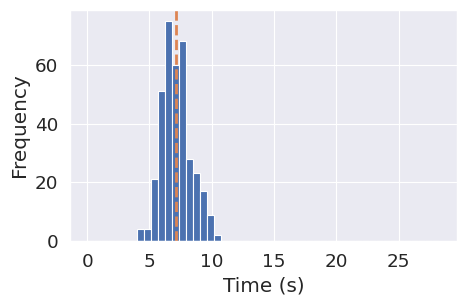

In [7]:
stats = [
    "prompt_revision_time",
    "dalle_tool_time",
    "total_time",
    "revised_prompt_tokens_per_second",
]

print(len(df_orig[df_orig["response_type"] == "success"][df_orig["model_slug"] == "gpt-4"]))

stat = stats[2]
model = "gpt-4o"

df = df_orig.copy()
df = (
    df
    [df["response_type"] == "success"]
    [df["model_slug"] == model]
    .pipe(remove_outliers_iqr, stat)
)

print(f'Range: {df_orig[stat].min()} - {df_orig[stat].max()}')
print(df[stat].describe())

fig, ax = plt.subplots(figsize=(5, 3))
max_val = df_orig[stat].max()

ax = (
    df
    [stat]
    .plot
    .hist(bins=50, alpha=1, range=(0, max_val), xlabel="Time (s)")
)
ax.axvline(df[stat].mean(), color=palette[1], linestyle='dashed', linewidth=2)

plt.show()

### Q: Baseline Revision Time

Using optimal split: 4.817390561103821 (information_gain = 0.9473029652004117)
724 724


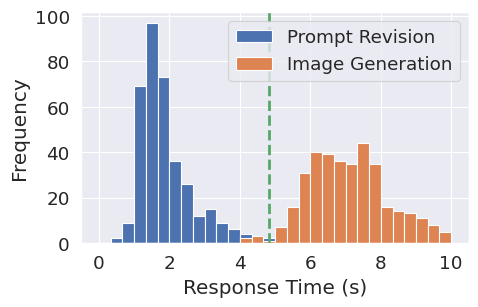

In [8]:
X = np.array(
    [[i] for i in list(df["prompt_revision_time"])]
    + [[i] for i in list(df["total_time"])]
)
Y = np.array(
    ["revising" for _ in range(len(df["prompt_revision_time"]))]
    + ["dalle" for _ in range(len(df["total_time"]))]
)
best_feature, best_value, best_gain = find_best_split(X, Y)
print(f"Using optimal split: {best_value} (information_gain = {best_gain})")

print(len(X), len(Y))

fig, ax = plt.subplots(figsize=(5,3))

fixed_range = (0, 10)
ax.hist(df["prompt_revision_time"], bins=30, label="Prompt Revision", color=palette[0], range=fixed_range)
ax.hist(df["total_time"], bins=30, label="Image Generation", color=palette[1], range=fixed_range)
ax.axvline(x=best_value, color=palette[2], linestyle="--", linewidth=2)

ax.set_xlabel("Response Time (s)")
ax.set_ylabel("Frequency")

ax.legend()

plt.show()